# Scandinavian wolves dataset analysis
## Start with requiered libraries
You should install pandas, scipy, and for graphics there should be seaborn installed and matplotlib
In conda promt write the following code:
```python
conda install pandas scipy seaborn matplotlib
```

In [1]:
import pandas as pd
from os import listdir
import scipy.stats as st

Here are placed the requiered data to do the analysis.

**ypg** (years per generation),(int number) as GONE way of calculation it's meant as number of generations it's necessary to use the data that comes from the GONE output that estimates Ne per generation to a year

**starting_year** (year that the data is extracted) where we should place the generation 1

**folder** Name of the folder that is in the same root as it's running this notebook which contains the data from GONE output

**folder2** As here we are Using two output from two different data, here we declare the name of the two folders.

The 2007 folder it's without immigrants, and the 20072 is with immigrants

In [2]:
#year per generation for the GONE DATA
ypg=4
starting_year=2010
generation_length=99
#Working folder
folder="2007" #No immigrants
folder2="20072" #With immigrants

### In the next cell:
It lists all the files in a specified folder and stores them in a list called filelist that is converted into pandas Series
It creates a list numlist of strings from “p1” to “p9” and then from “10” to the length of filelist that is converted into pandas Series.
It iterates over filelistdf and numlistdf. If the last two characters of a filename in filelistdf match a number in numlistdf, it replaces the number in numlistdf with the filename.
This make possible to preparate a sorted list of filenames to be able to open them alter to join in a single dataset

In [3]:
filelist=listdir("./"+folder)

filelistdf=pd.Series(filelist)
numlist=[]
for i in range(1,10):
    numlist.append("p"+str(i))
for i in range(10,len(filelist)+1):
    numlist.append(str(i))
    
numlistdf=pd.Series(numlist)

for index1, filename in filelistdf.items():
    for index2, num in numlistdf.items():
        if filename[-2:]==num:
            numlistdf.replace(num,filename,inplace=True)

### Data join and dataframe creation
In this cell we open all the files listed before to join them in a single dataset, joined column by column
Then the median and the weight are calculated using scipy, line by line.
After that the confidence intervals are calculated using the scipy t.interval function, with a 95% confidence, using the weight as a scale line by line too.

### Calculated mean and confidence dataframe
After the previous calculation, a different dataframe is created

In [4]:
dataframe=pd.DataFrame([])
for index,filename in filelistdf.items():
        df=pd.read_csv("./"+folder+"/"+filename,sep="\t") #For scandinavia
        df=df.iloc[1:generation_length]
        df=df.astype('float64')
        dataframe=pd.concat([dataframe,df],axis=1)
mean=dataframe.median(axis=1)

weight=st.sem(dataframe, axis=1)
#t distribution at 95%
try:
    minint,maxint=st.t.interval(confidence=0.95, df=len(dataframe)-1, loc=mean, scale=weight)
except:
    minint,maxint=st.t.interval(alpha=0.95, df=len(dataframe)-1, loc=mean, scale=weight)
#Exception have been added to add compatiblity with scipy < 1.11.0 see: https://docs.scipy.org/doc/scipy/release/1.11.0-notes.html

minintdf=pd.DataFrame(minint)
maxintdf=pd.DataFrame(maxint)
meandf=pd.DataFrame(mean)
minintdf.reset_index(drop=True, inplace=True)
maxintdf.reset_index(drop=True, inplace=True)
meandf.reset_index(drop=True, inplace=True)

yearlist=[]
for i in range(0,generation_length):
    yearlist.append(starting_year-(i*ypg))
print(yearlist)
yearlistdf=pd.DataFrame(yearlist)
dataframe.reset_index(drop=True, inplace=True)
newindex=[]
for i in range(1,generation_length):
    newindex.append(i)
indexdf=pd.DataFrame(newindex)
dataf=pd.concat([maxintdf,meandf,minintdf],axis=1)
dataframe=pd.concat([dataframe,dataf],axis=1)
dataframe=pd.concat([dataframe,indexdf],axis=1)
dataframe=pd.concat([dataframe,yearlistdf],axis=1)
newindexnames=[]
for i in range(1,41):
    newindexnames.append("Rep_"+str(i))
newindexnames.append("Maxdesv")
newindexnames.append("Mean")
newindexnames.append("Mindesv")
newindexnames.append("Generation")
newindexnames.append("Year")
dataframe.columns=newindexnames
dataframe=dataframe.set_index('Year')
dataf=pd.concat([dataf,yearlistdf],axis=1)

datafindexnames=[]
datafindexnames.append("Maxdesv")
datafindexnames.append("Mean")
datafindexnames.append("Mindesv")
datafindexnames.append("Year")
dataf.columns=datafindexnames
dataf=dataf.set_index('Year')

[2010, 2006, 2002, 1998, 1994, 1990, 1986, 1982, 1978, 1974, 1970, 1966, 1962, 1958, 1954, 1950, 1946, 1942, 1938, 1934, 1930, 1926, 1922, 1918, 1914, 1910, 1906, 1902, 1898, 1894, 1890, 1886, 1882, 1878, 1874, 1870, 1866, 1862, 1858, 1854, 1850, 1846, 1842, 1838, 1834, 1830, 1826, 1822, 1818, 1814, 1810, 1806, 1802, 1798, 1794, 1790, 1786, 1782, 1778, 1774, 1770, 1766, 1762, 1758, 1754, 1750, 1746, 1742, 1738, 1734, 1730, 1726, 1722, 1718, 1714, 1710, 1706, 1702, 1698, 1694, 1690, 1686, 1682, 1678, 1674, 1670, 1666, 1662, 1658, 1654, 1650, 1646, 1642, 1638, 1634, 1630, 1626, 1622, 1618]


In [5]:
#For the non immigrants dataframe
dataf1=dataf

In [6]:
folder=folder2

In [7]:
filelist=listdir("./"+folder)
filelistdf=pd.Series(filelist)
numlist=[]
for i in range(1,10):
    numlist.append("p"+str(i))
for i in range(10,len(filelist)+1):
    numlist.append(str(i))
numlistdf=pd.Series(numlist)
for index1, filename in filelistdf.items():
    for index2, num in numlistdf.items():
        if filename[-2:]==num:
            numlistdf.replace(num,filename,inplace=True)

In [8]:
dataframe=pd.DataFrame([])
#dataframe=dataframe.set_index('Generation')
#dataframe= pd.read_table("./"+address+"/"+filelist[0],usecols=[0],header=None,names=["Generation"])
for index,filename in filelistdf.items():
        #df=pd.read_table("./"+folder+"/"+filename,usecols=[1],header=None) #For minessota
        df=pd.read_csv("./"+folder+"/"+filename,sep="\t") #For scandinavia
        df=df.iloc[1:generation_length]
        df=df.astype('float64')
        dataframe=pd.concat([dataframe,df],axis=1)
#dataframe=dataframe.iloc[2:200]
mean=dataframe.median(axis=1)

weight=st.sem(dataframe, axis=1)
#t distribution at 95%
try:
    minint,maxint=st.t.interval(confidence=0.95, df=len(dataframe)-1, loc=mean, scale=weight)
except:
    minint,maxint=st.t.interval(alpha=0.95, df=len(dataframe)-1, loc=mean, scale=weight)
#Exception have been added to add compatiblity with scipy < 1.11.0 see: https://docs.scipy.org/doc/scipy/release/1.11.0-notes.html
#st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
minintdf=pd.DataFrame(minint)
maxintdf=pd.DataFrame(maxint)
meandf=pd.DataFrame(mean)
minintdf.reset_index(drop=True, inplace=True)
maxintdf.reset_index(drop=True, inplace=True)
meandf.reset_index(drop=True, inplace=True)
#dataf=pd.DataFrame([])

#here we will put the years corresponding to generation
#starting_year
#ypg
#generation_length=200
yearlist=[]
for i in range(0,generation_length):
    yearlist.append(starting_year-(i*ypg))
print(yearlist)
yearlistdf=pd.DataFrame(yearlist)
dataframe.reset_index(drop=True, inplace=True)
newindex=[]
for i in range(1,generation_length):
    newindex.append(i)
indexdf=pd.DataFrame(newindex)
dataf=pd.concat([maxintdf,meandf,minintdf],axis=1)
dataframe=pd.concat([dataframe,dataf],axis=1)
dataframe=pd.concat([dataframe,indexdf],axis=1)
dataframe=pd.concat([dataframe,yearlistdf],axis=1)
newindexnames=[]
for i in range(1,41):
    newindexnames.append("Rep_"+str(i))
newindexnames.append("Maxdesv")
newindexnames.append("Mean")
newindexnames.append("Mindesv")


newindexnames.append("Generation")
newindexnames.append("Year")
dataframe.columns=newindexnames
dataframe=dataframe.set_index('Year')
dataf=pd.concat([dataf,yearlistdf],axis=1)

datafindexnames=[]
datafindexnames.append("Maxdesv")
datafindexnames.append("Mean")
datafindexnames.append("Mindesv")
datafindexnames.append("Year")
dataf.columns=datafindexnames
dataf=dataf.set_index('Year')

[2010, 2006, 2002, 1998, 1994, 1990, 1986, 1982, 1978, 1974, 1970, 1966, 1962, 1958, 1954, 1950, 1946, 1942, 1938, 1934, 1930, 1926, 1922, 1918, 1914, 1910, 1906, 1902, 1898, 1894, 1890, 1886, 1882, 1878, 1874, 1870, 1866, 1862, 1858, 1854, 1850, 1846, 1842, 1838, 1834, 1830, 1826, 1822, 1818, 1814, 1810, 1806, 1802, 1798, 1794, 1790, 1786, 1782, 1778, 1774, 1770, 1766, 1762, 1758, 1754, 1750, 1746, 1742, 1738, 1734, 1730, 1726, 1722, 1718, 1714, 1710, 1706, 1702, 1698, 1694, 1690, 1686, 1682, 1678, 1674, 1670, 1666, 1662, 1658, 1654, 1650, 1646, 1642, 1638, 1634, 1630, 1626, 1622, 1618]


In [9]:
#Use with the immigrants dataframe
dataf2=dataf

In [10]:
dataf1.to_csv("Export_noimm"+"2007"+".csv")
dataf2.to_csv("Export_imm"+"20072"+".csv")
dataf1.to_excel(("Export_noimm"+"2007"+".xlsx"))
dataf2.to_excel(("Export_imm"+"20072"+".xlsx"))

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt    # v 3.3.2
import sys

<Axes: xlabel='Year', ylabel='Mean'>

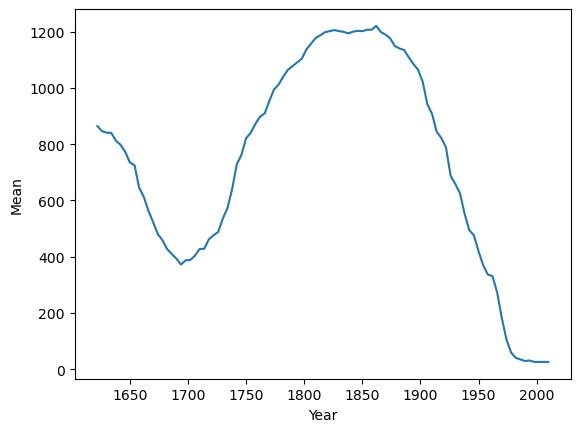

In [12]:
sns.lineplot(data=dataf1, x="Year", y="Mean")

In [13]:
#generate a subset
subset1=dataf1.iloc[0:10]
subset2=dataf2.iloc[0:10]

In [14]:
subset1=subset1.reset_index()

In [15]:
x= subset1.Year
mean1 = subset1.Mean
lower1 = subset1.Mindesv
upper1 = subset1.Maxdesv
mean2 = subset2.Mean
lower2 = subset2.Mindesv
upper2 = subset2.Maxdesv

In [16]:
mean1

0     26.04420
1     26.04420
2     26.04420
3     26.04420
4     31.03715
5     29.19960
6     34.77700
7     40.50140
8     59.81200
9    106.55600
Name: Mean, dtype: float64

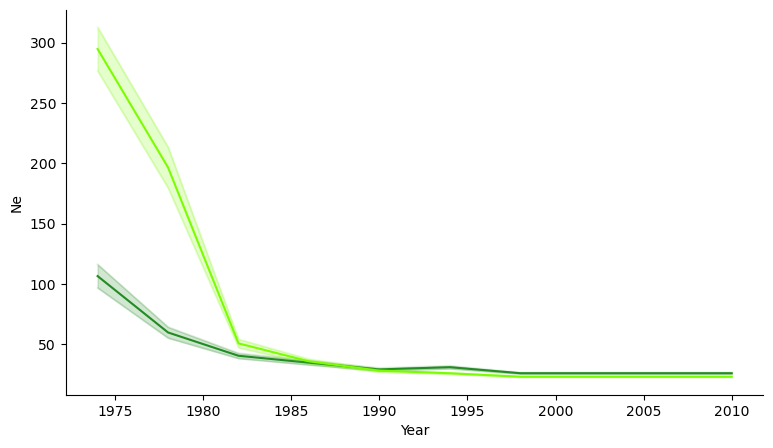

In [17]:
x= subset1.Year
mean1 = subset1.Mean
lower1 = subset1.Mindesv
upper1 = subset1.Maxdesv
mean2 = subset2.Mean
lower2 = subset2.Mindesv
upper2 = subset2.Maxdesv

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, mean1, color='forestgreen',label=' mean')
ax.plot(x, lower1, color='forestgreen', alpha=0.1)
ax.plot(x, upper1, color='forestgreen', alpha=0.1)
ax.fill_between(x, lower1, upper1, color='forestgreen', alpha=0.2)
ax.plot(x, mean2, color='lawngreen',label=' mean')
ax.plot(x, lower2, color='lawngreen', alpha=0.1)
ax.plot(x, upper2, color='lawngreen', alpha=0.1)
ax.fill_between(x, lower2, upper2, color='lawngreen', alpha=0.2)
ax.set_xlabel('Year')
ax.set_ylabel('Ne')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
fig.savefig('Scandinaviaplotcombi.png') 

In [18]:
from seaborn import lineplot

NameError: name 'lower' is not defined

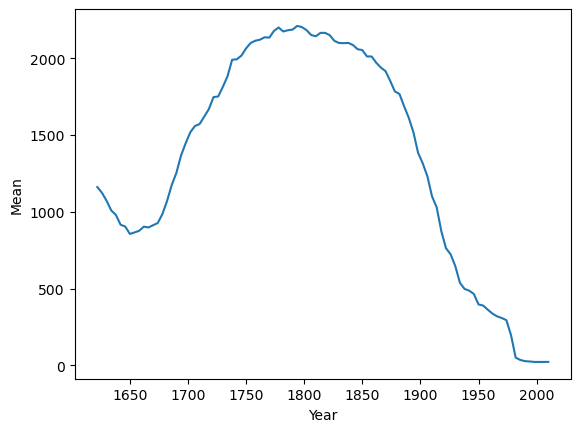

In [19]:
ax = lineplot(data=dataframe, x=dataframe.index, y="Mean")
ax.fill_between(dataframe.index, lower, upper, alpha=0.1)
ax.set_xlabel('Generation')
ax.set_ylabel('Ne')

In [ ]:
#generate a subset
subset=dataframe.iloc[0:11]
x= subset.index
mean = subset.Mean
lower = subset.Mindesv
upper = subset.Maxdesv

In [ ]:
subset

In [ ]:
ax = lineplot(data=subset, x=subset.index, y="Mean")
ax.fill_between(subset.index, lower, upper, alpha=0.1)
ax.set_xlabel('Year')
ax.set_ylabel('Ne')